# Setup

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# # show figures in the notebook
%matplotlib inline 


sc.settings.set_figure_params(dpi=100) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow

# # show figures in the notebook
# %matplotlib inline 


In [6]:
import sys
sys.path.append('/home/angela/src/scVI_TSP/')
sys.path.append('/home/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

# Load the color dictionaries

In [31]:
donors_color_dict = donor_colors()
tissues_color_dict = tissue_colors()
methods_color_dict = method_colors()
compartments_color_dict = compartment_colors()

{'TSP1': '#40b5c4', 'TSP2': '#081d58'}

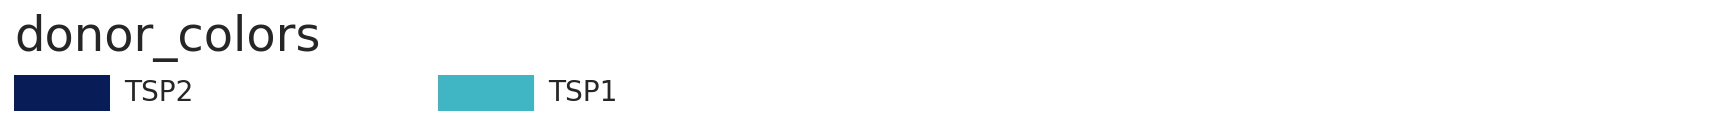

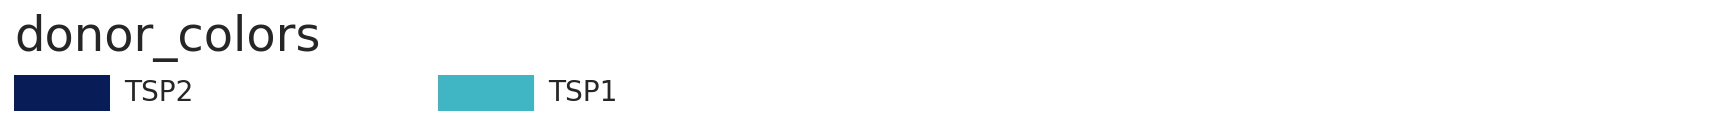

In [32]:
display(donors_color_dict)
plot_colortable(donors_color_dict,'donor_colors')
# plt.savefig("./figures/donor_color_dict.pdf")

{'Bladder': '#e7969c',
 'Blood': '#d6616b',
 'Bone_Marrow': '#cedb9c',
 'Kidney': '#7b4173',
 'Large_Intestine': '#31a354',
 'Lung': '#3182bd',
 'Lymph_Node': '#8c6d31',
 'Muscle': '#e7ba52',
 'Pancreas': '#fd8d3c',
 'Small_Intestine': '#6baed6',
 'Spleen': '#393b79',
 'Thymus': '#9c9ede',
 'Trachea': '#969696',
 'Vasculature': '#843c39'}

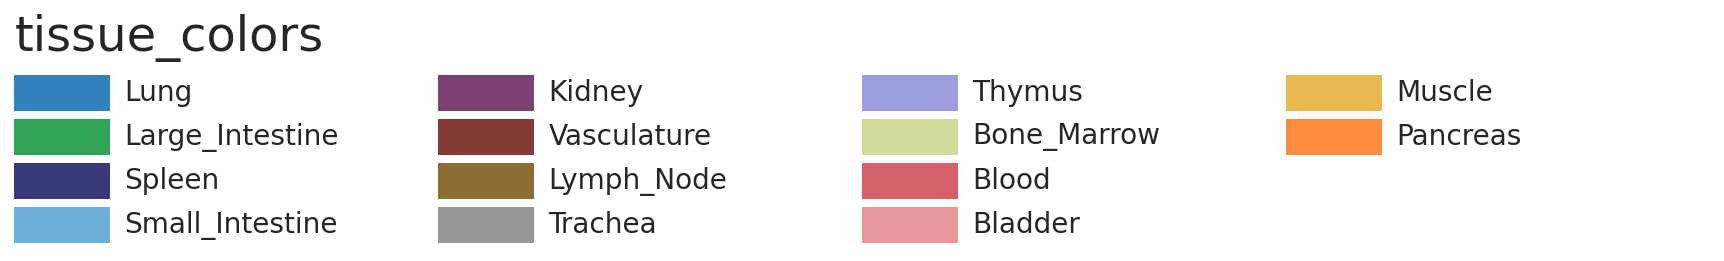

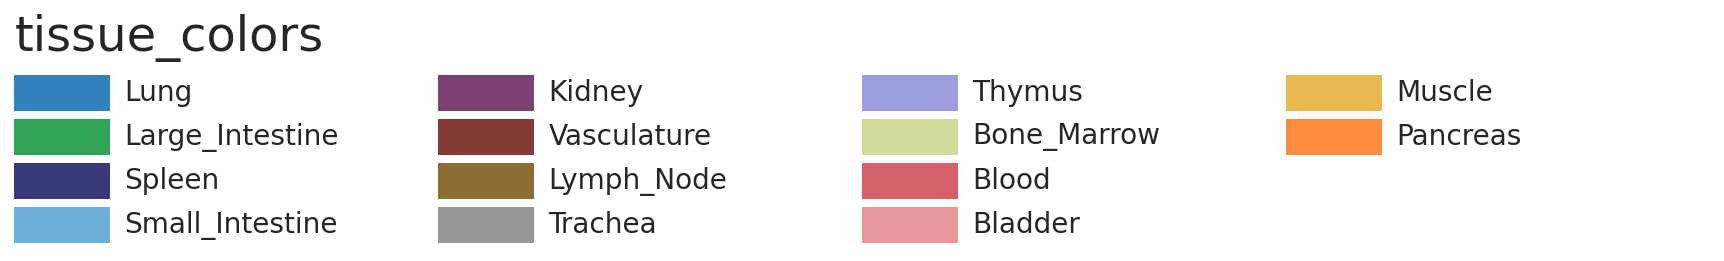

In [33]:
display(tissues_color_dict)
plot_colortable(tissues_color_dict,'tissue_colors')
# plt.savefig("./figures/tissue_color_dict.pdf")

{'10X': '#90ee90', 'smartseq2': '#006400'}

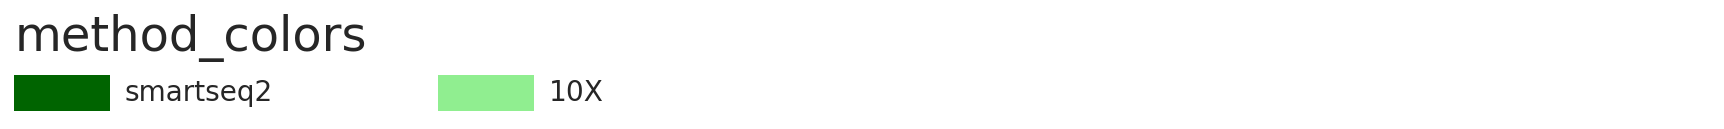

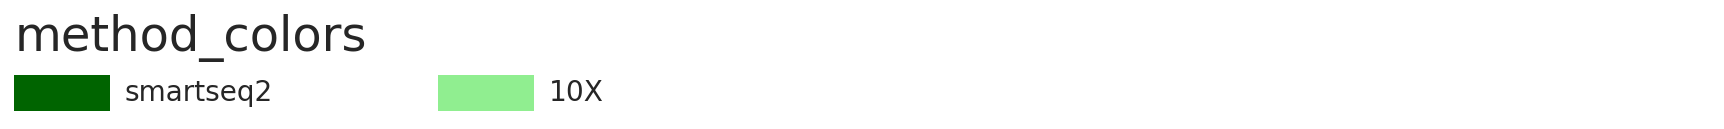

In [34]:
display(methods_color_dict)
plot_colortable(methods_color_dict,'method_colors')
# plt.savefig("./figures/method_color_dict.pdf")

{'Endothelial': '#fee187',
 'Epithelial': '#feab49',
 'Immune': '#fc5b2e',
 'Stromal': '#d41020',
 'PNS': '#800026'}

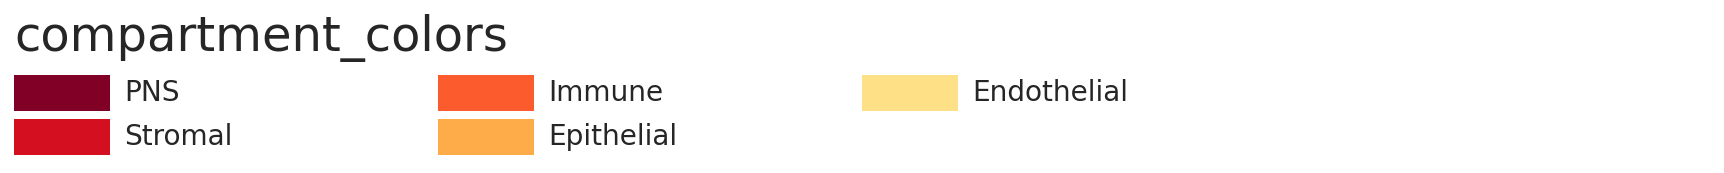

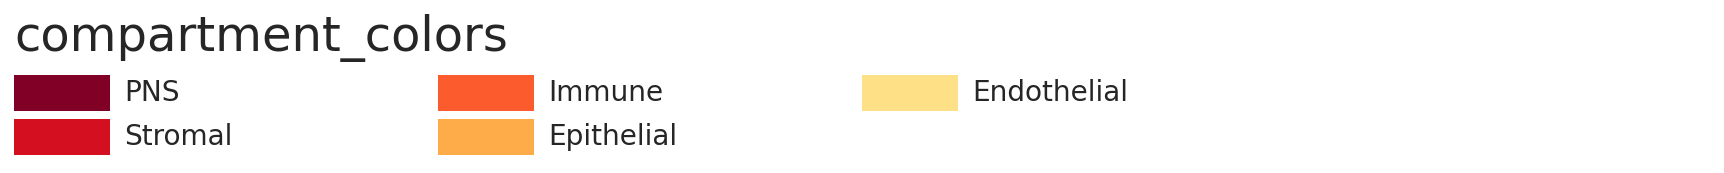

In [35]:
display(compartments_color_dict)
plot_colortable(compartments_color_dict,'compartment_colors')
# plt.savefig("./figures/compartment_color_dict.pdf")

# Load the data

In [7]:
data_path = "/mnt/ibm_lg/angela/sapiens/data/sapiens_paper1/"

In [8]:
adata = sc.read_h5ad(data_path + "Pilot1_Pilot2_decontX_Oct2020.h5ad")
adata

AnnData object with n_obs × n_vars = 149345 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_metho

In [26]:
len(set(adata.obs['cell_ontology_type']))

97

In [16]:
blood.X[100:110,110:110].todense()

matrix([], shape=(10, 0), dtype=float32)

In [14]:
blood = adata[adata.obs['tissue']=='Blood'].copy()
blood = remove_cats(blood)
sc.pp.neighbors(blood, use_rep="X_scvi_decontX")
sc.tl.umap(blood)
blood.write(data_path + "Pilot1_Pilot2_Blood.h5ad")

marrow = adata[adata.obs['tissue']=='Bone_Marrow'].copy()
marrow = remove_cats(marrow)
sc.pp.neighbors(marrow, use_rep="X_scvi_decontX")
sc.tl.umap(marrow)
marrow.write(data_path + "Pilot2_Marrow.h5ad")

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'X10X_run' as categorical
... storing 'smartseq2_barcode' as categorical
... storing 'smartseq2_library_plate' as categorical
... storing 'smartseq2_sorting_direction' as categorical
... storing 'smartseq2_sort_order' as categorical
... storing 'smartseq2_cDNA_Plate' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'X10X_replicate' as categorical
... storing 'sequencer' as categorical
... storing 'sex' as categorical
... storing 'tissue' as

# Figure 1

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


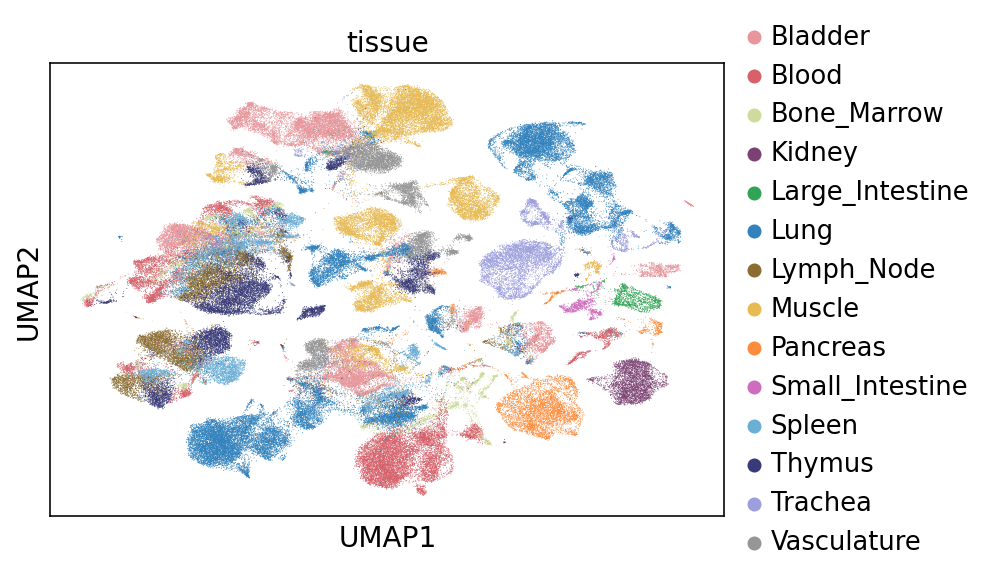

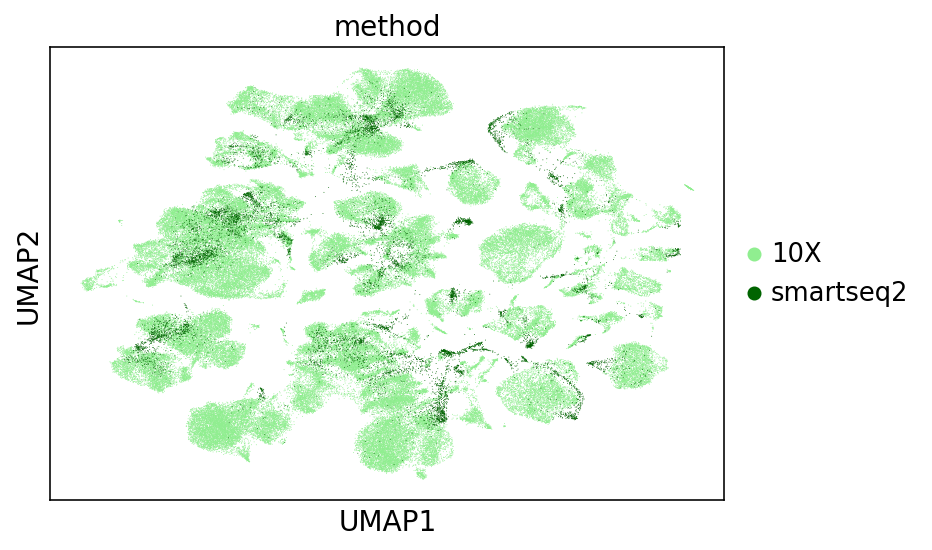

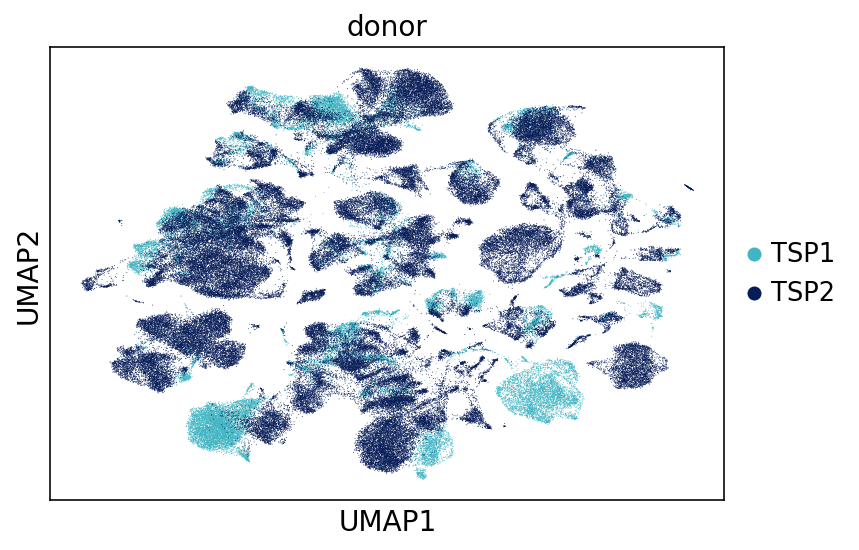

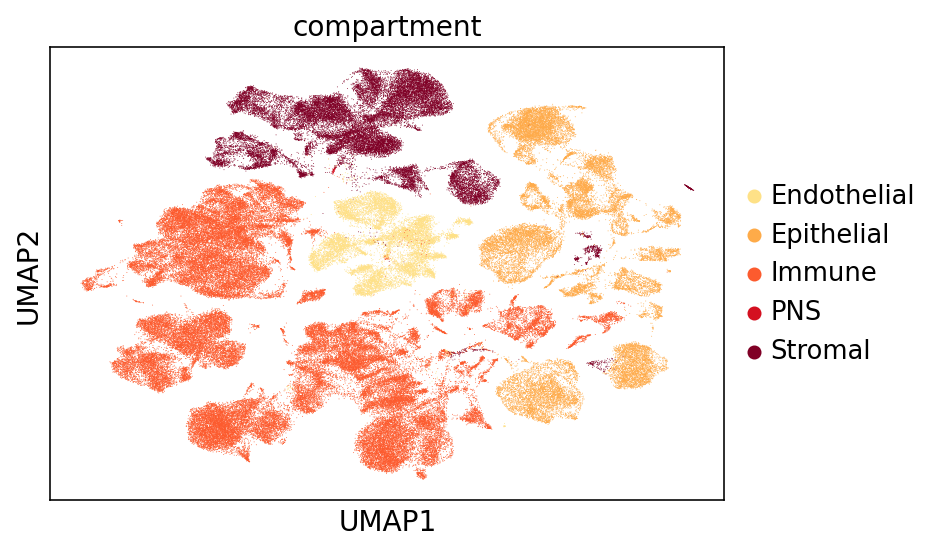

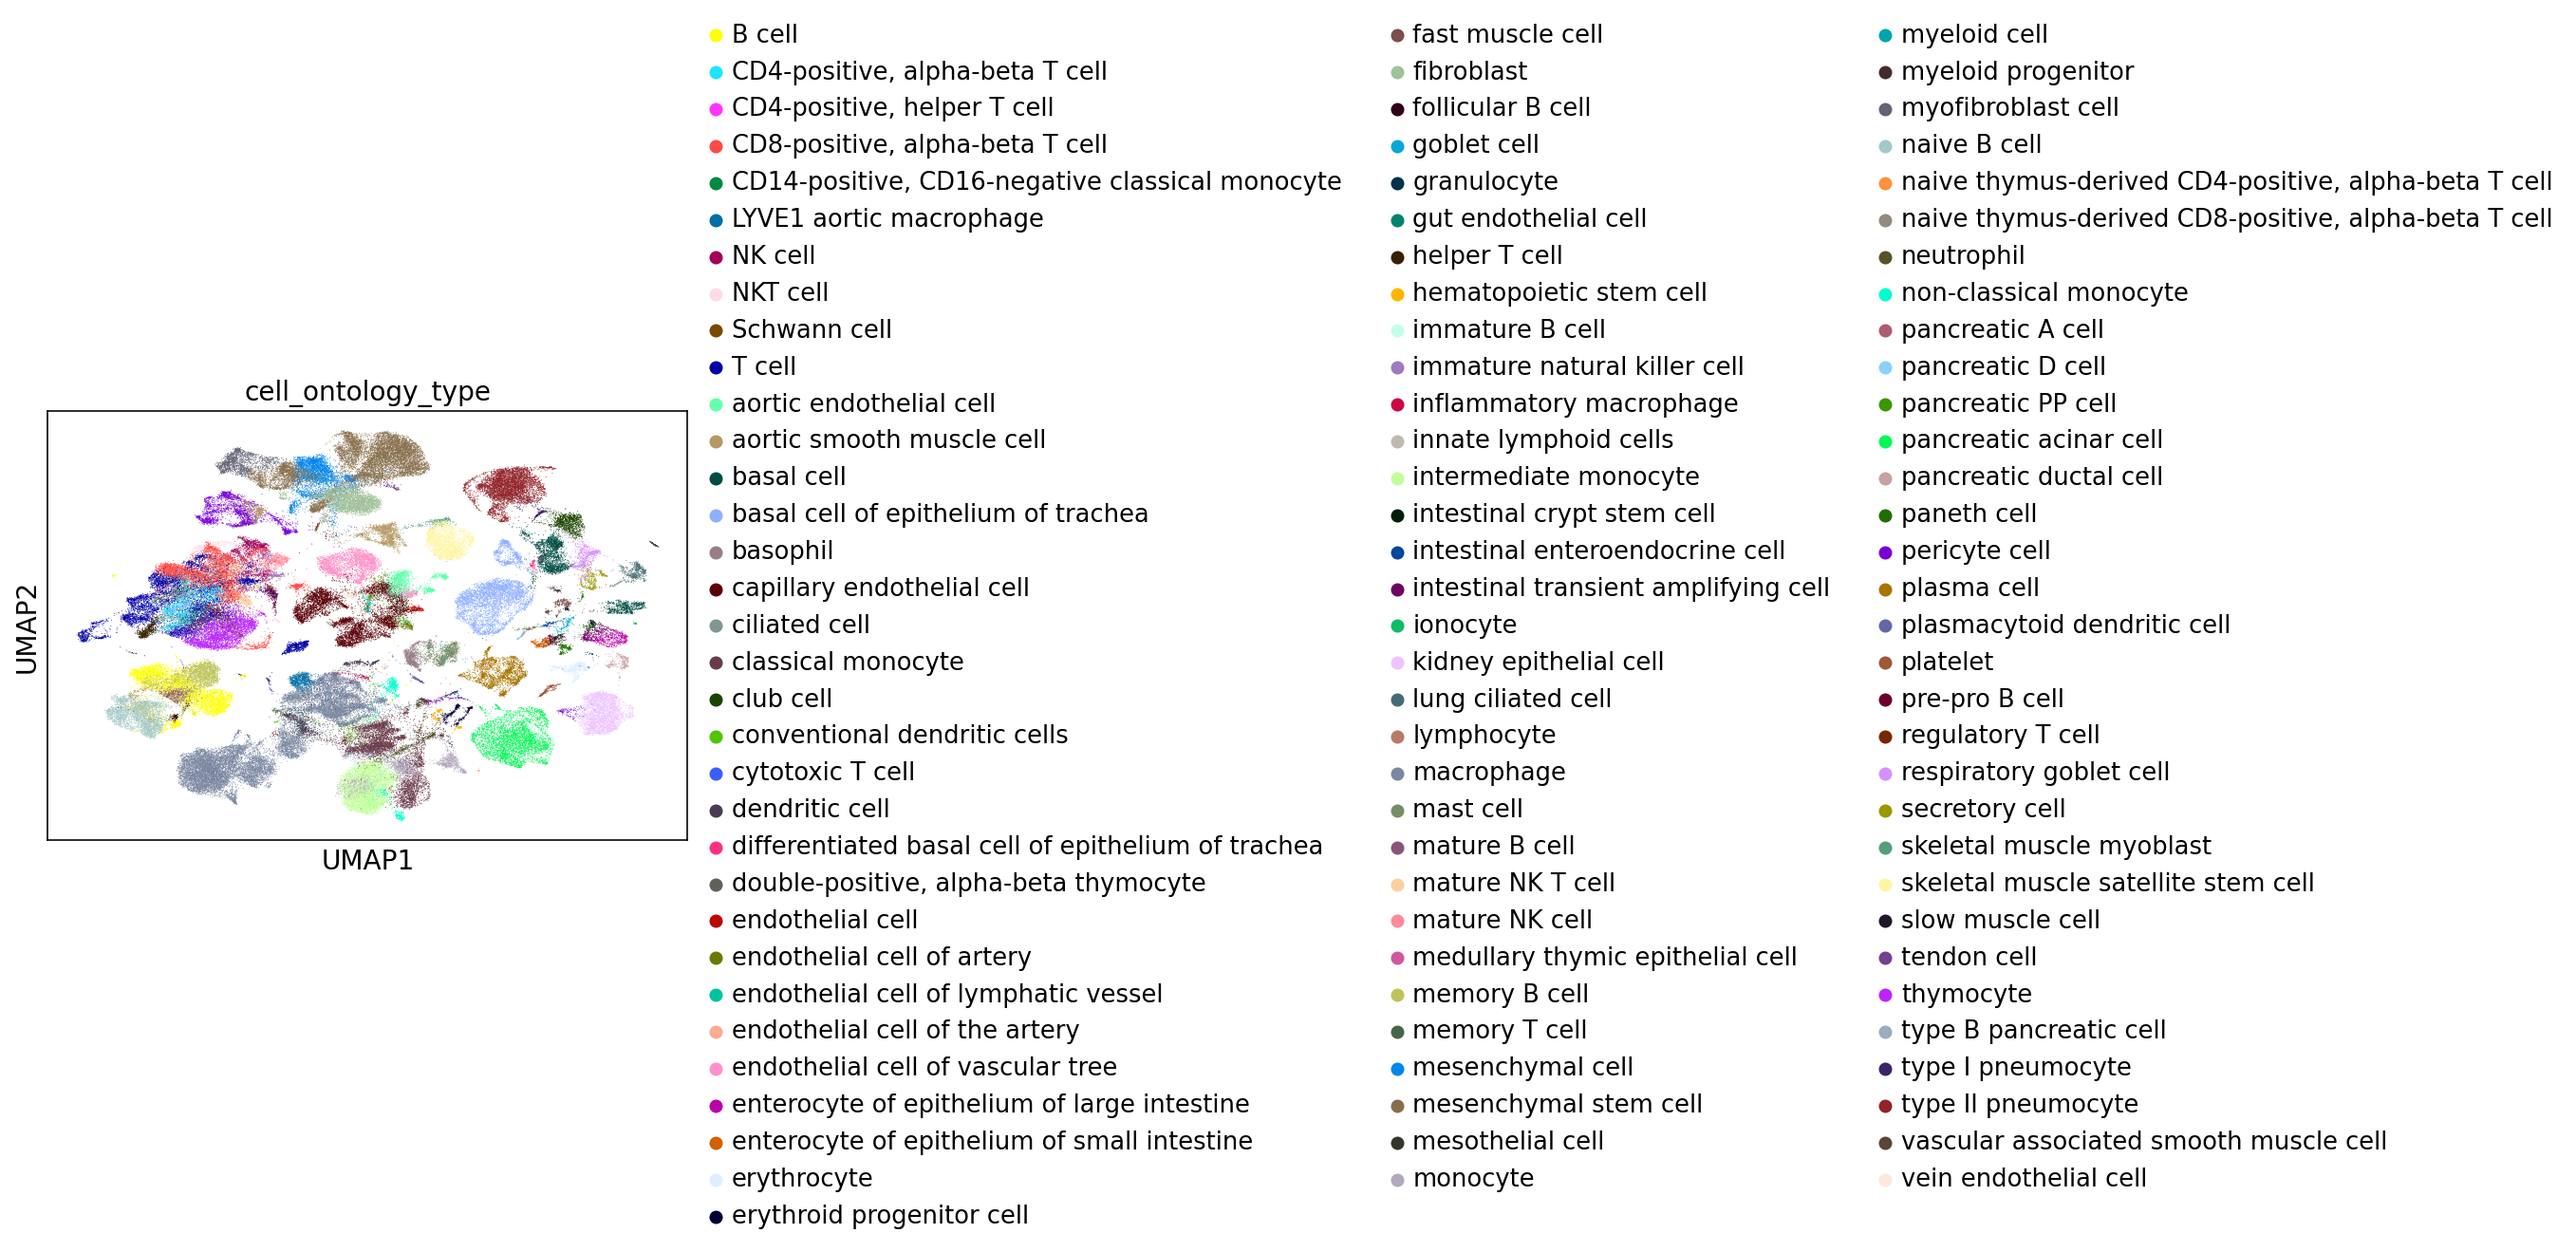

In [9]:
colorbylist = ['tissue','method','donor','compartment','cell_ontology_type']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
#            save = "_global_"+c+".pdf"
          )

## pre-processing steps

In [10]:
# adata = sc.read_h5ad(data_path + "Pilot1_Pilot2.Final.h5ad")
# adata = remove_cats(adata)
# adata

In [11]:
# adata = sc.read_h5ad(
#     "/mnt/ibm_lg/angela/sapiens/data/Pilot1_Pilot2_filtered_ensembl_id_Aug5.ss2_norm.ann.compartment.allgenes.h5ad")
# adata

In [29]:
adata = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/Pilot1_Pilot2_decontX_Oct2020.h5ad")
adata = remove_cats(adata)
adata

AnnData object with n_obs × n_vars = 149345 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_metho

In [ ]:
df = adata.obs.groupby(['tissue'])['Propagated.Annotationcollapsed'].agg([len,set])
df['setlen'] = [len(list(s)) for s in df['set']]
df = df[['setlen']]
df

Make sure the colors are set correctly

In [30]:
adata.uns['donor_colors'] = list(donors_color_dict.values())
adata.uns['method_colors'] = list(methods_color_dict.values())
adata.uns['compartment_oct2020_colors'] = list(compartments_color_dict.values())
adata.uns['compartment_colors'] = list(compartments_color_dict.values())
adata.uns['tissue_colors'] = list(tissues_color_dict.values())

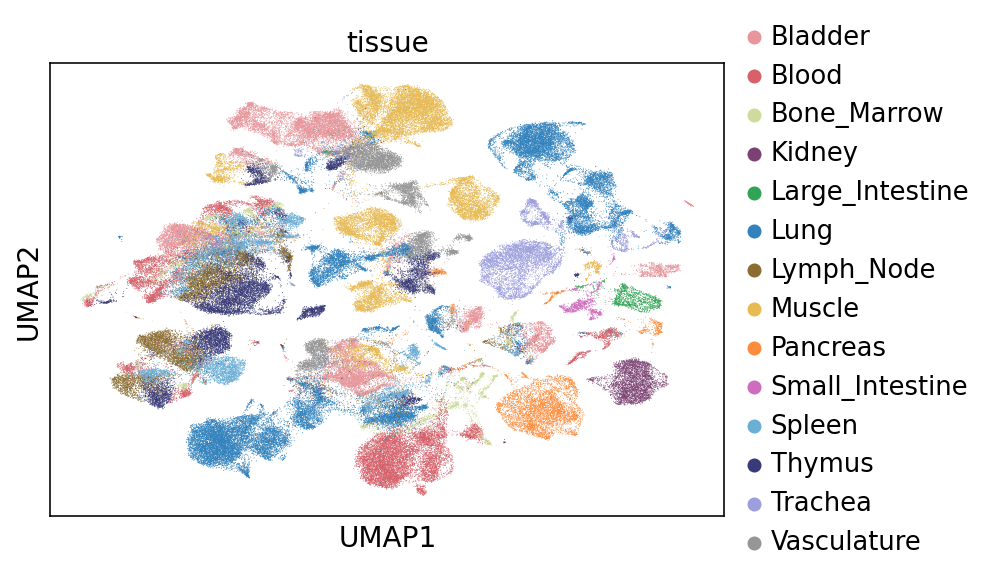

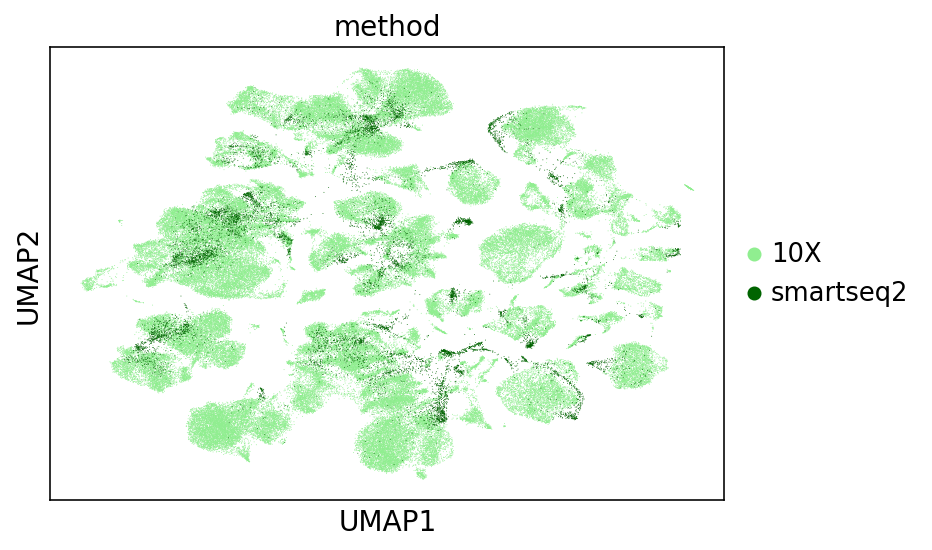

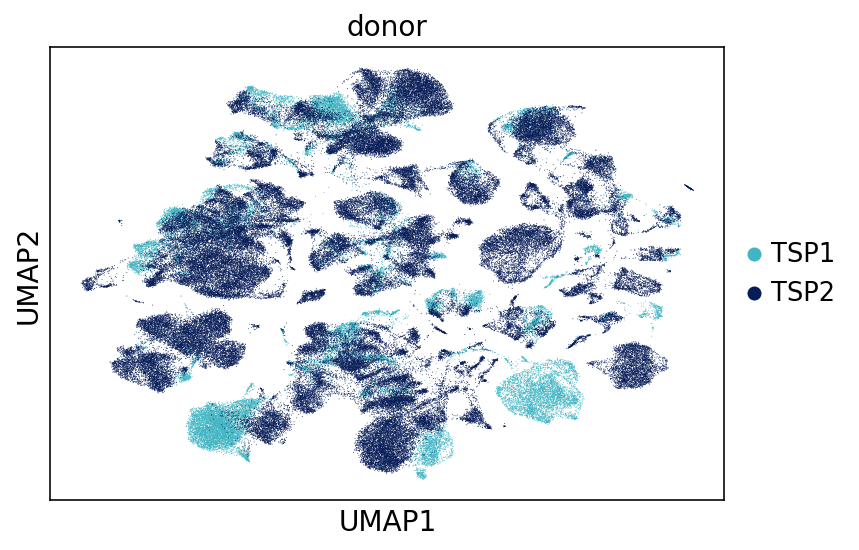

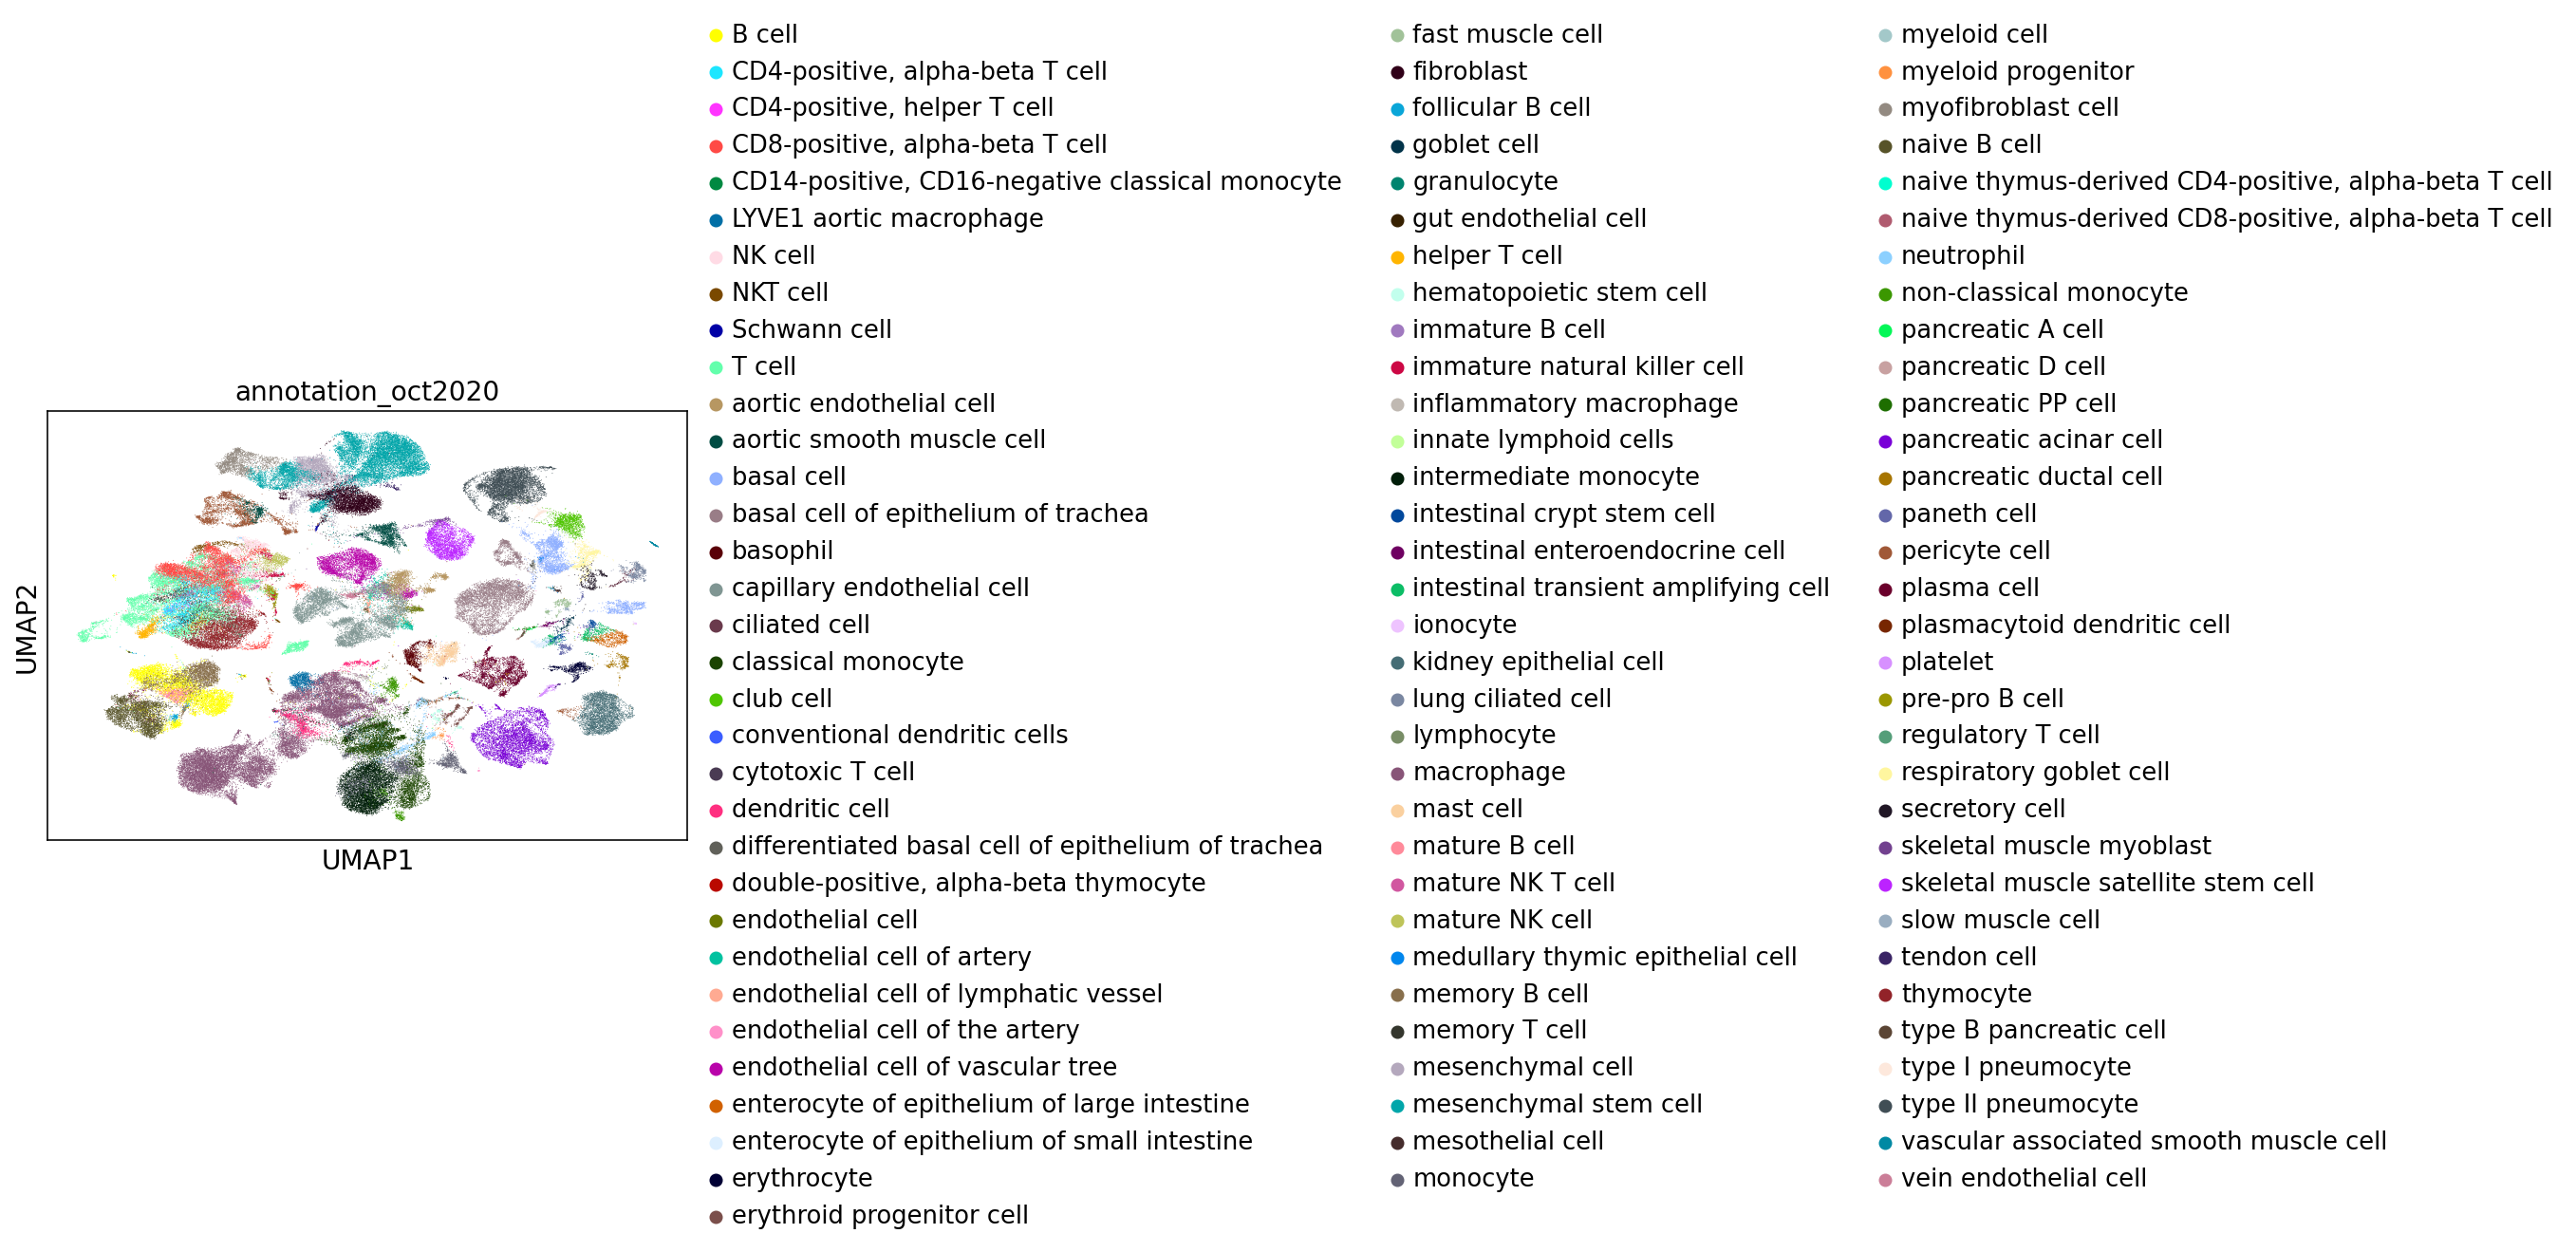

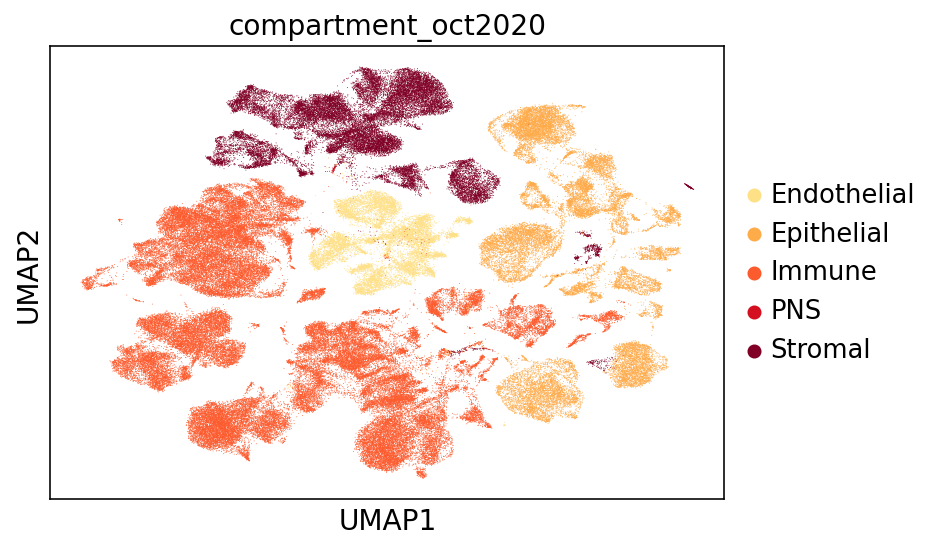

In [17]:
colorbylist = ['tissue','method','donor','annotation_oct2020','compartment_oct2020']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
#            save = "_global_"+c+".pdf"
          )

In [32]:
adata.obs['compartment'] = adata.obs['compartment_oct2020']
adata.obs['cell_ontology_type'] = adata.obs['annotation_oct2020']


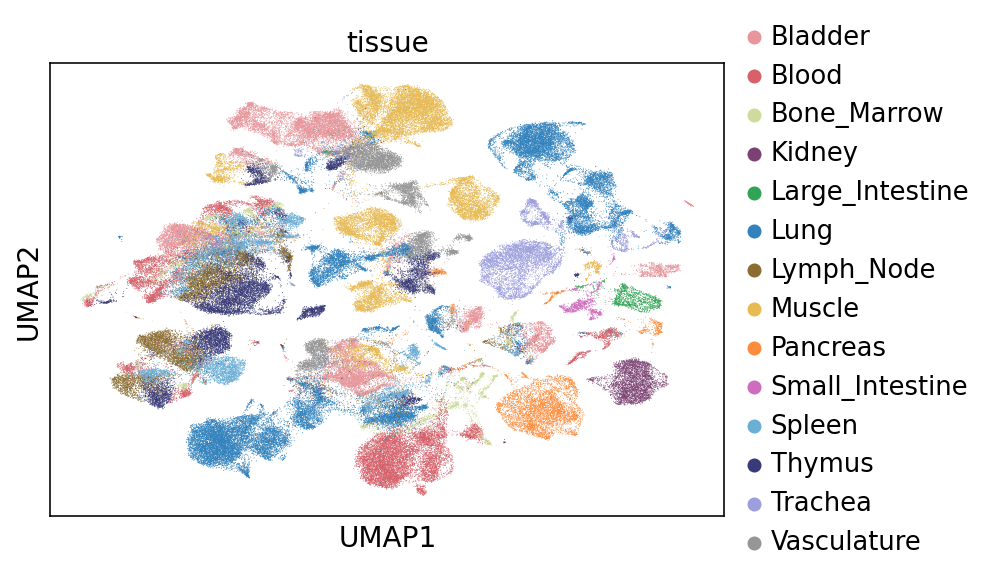

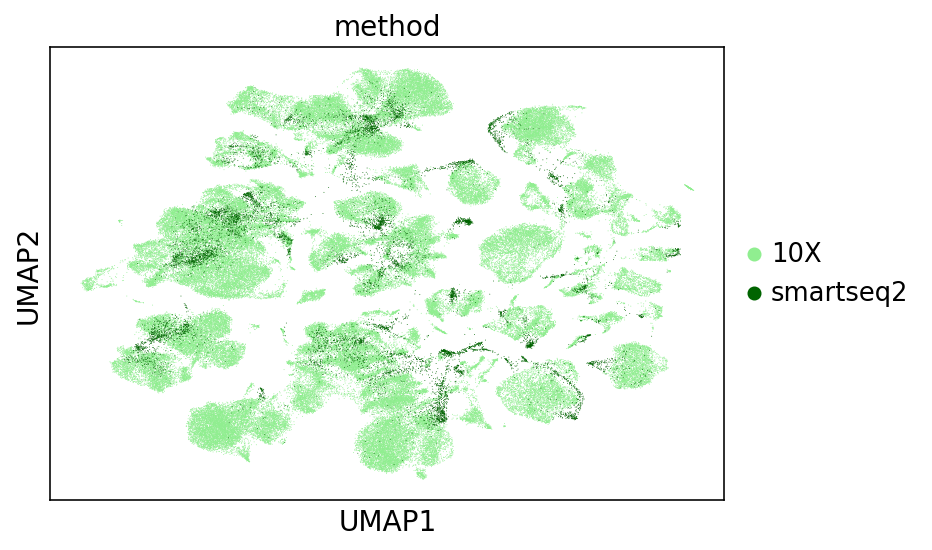

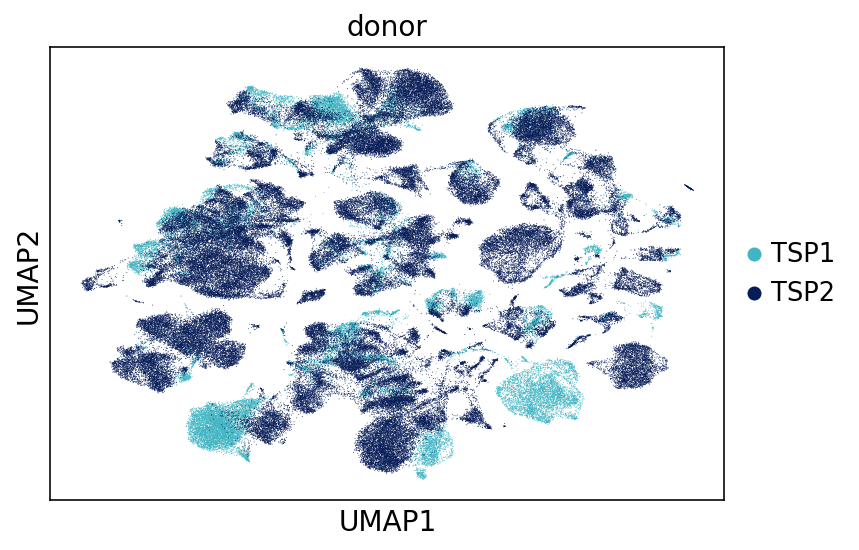

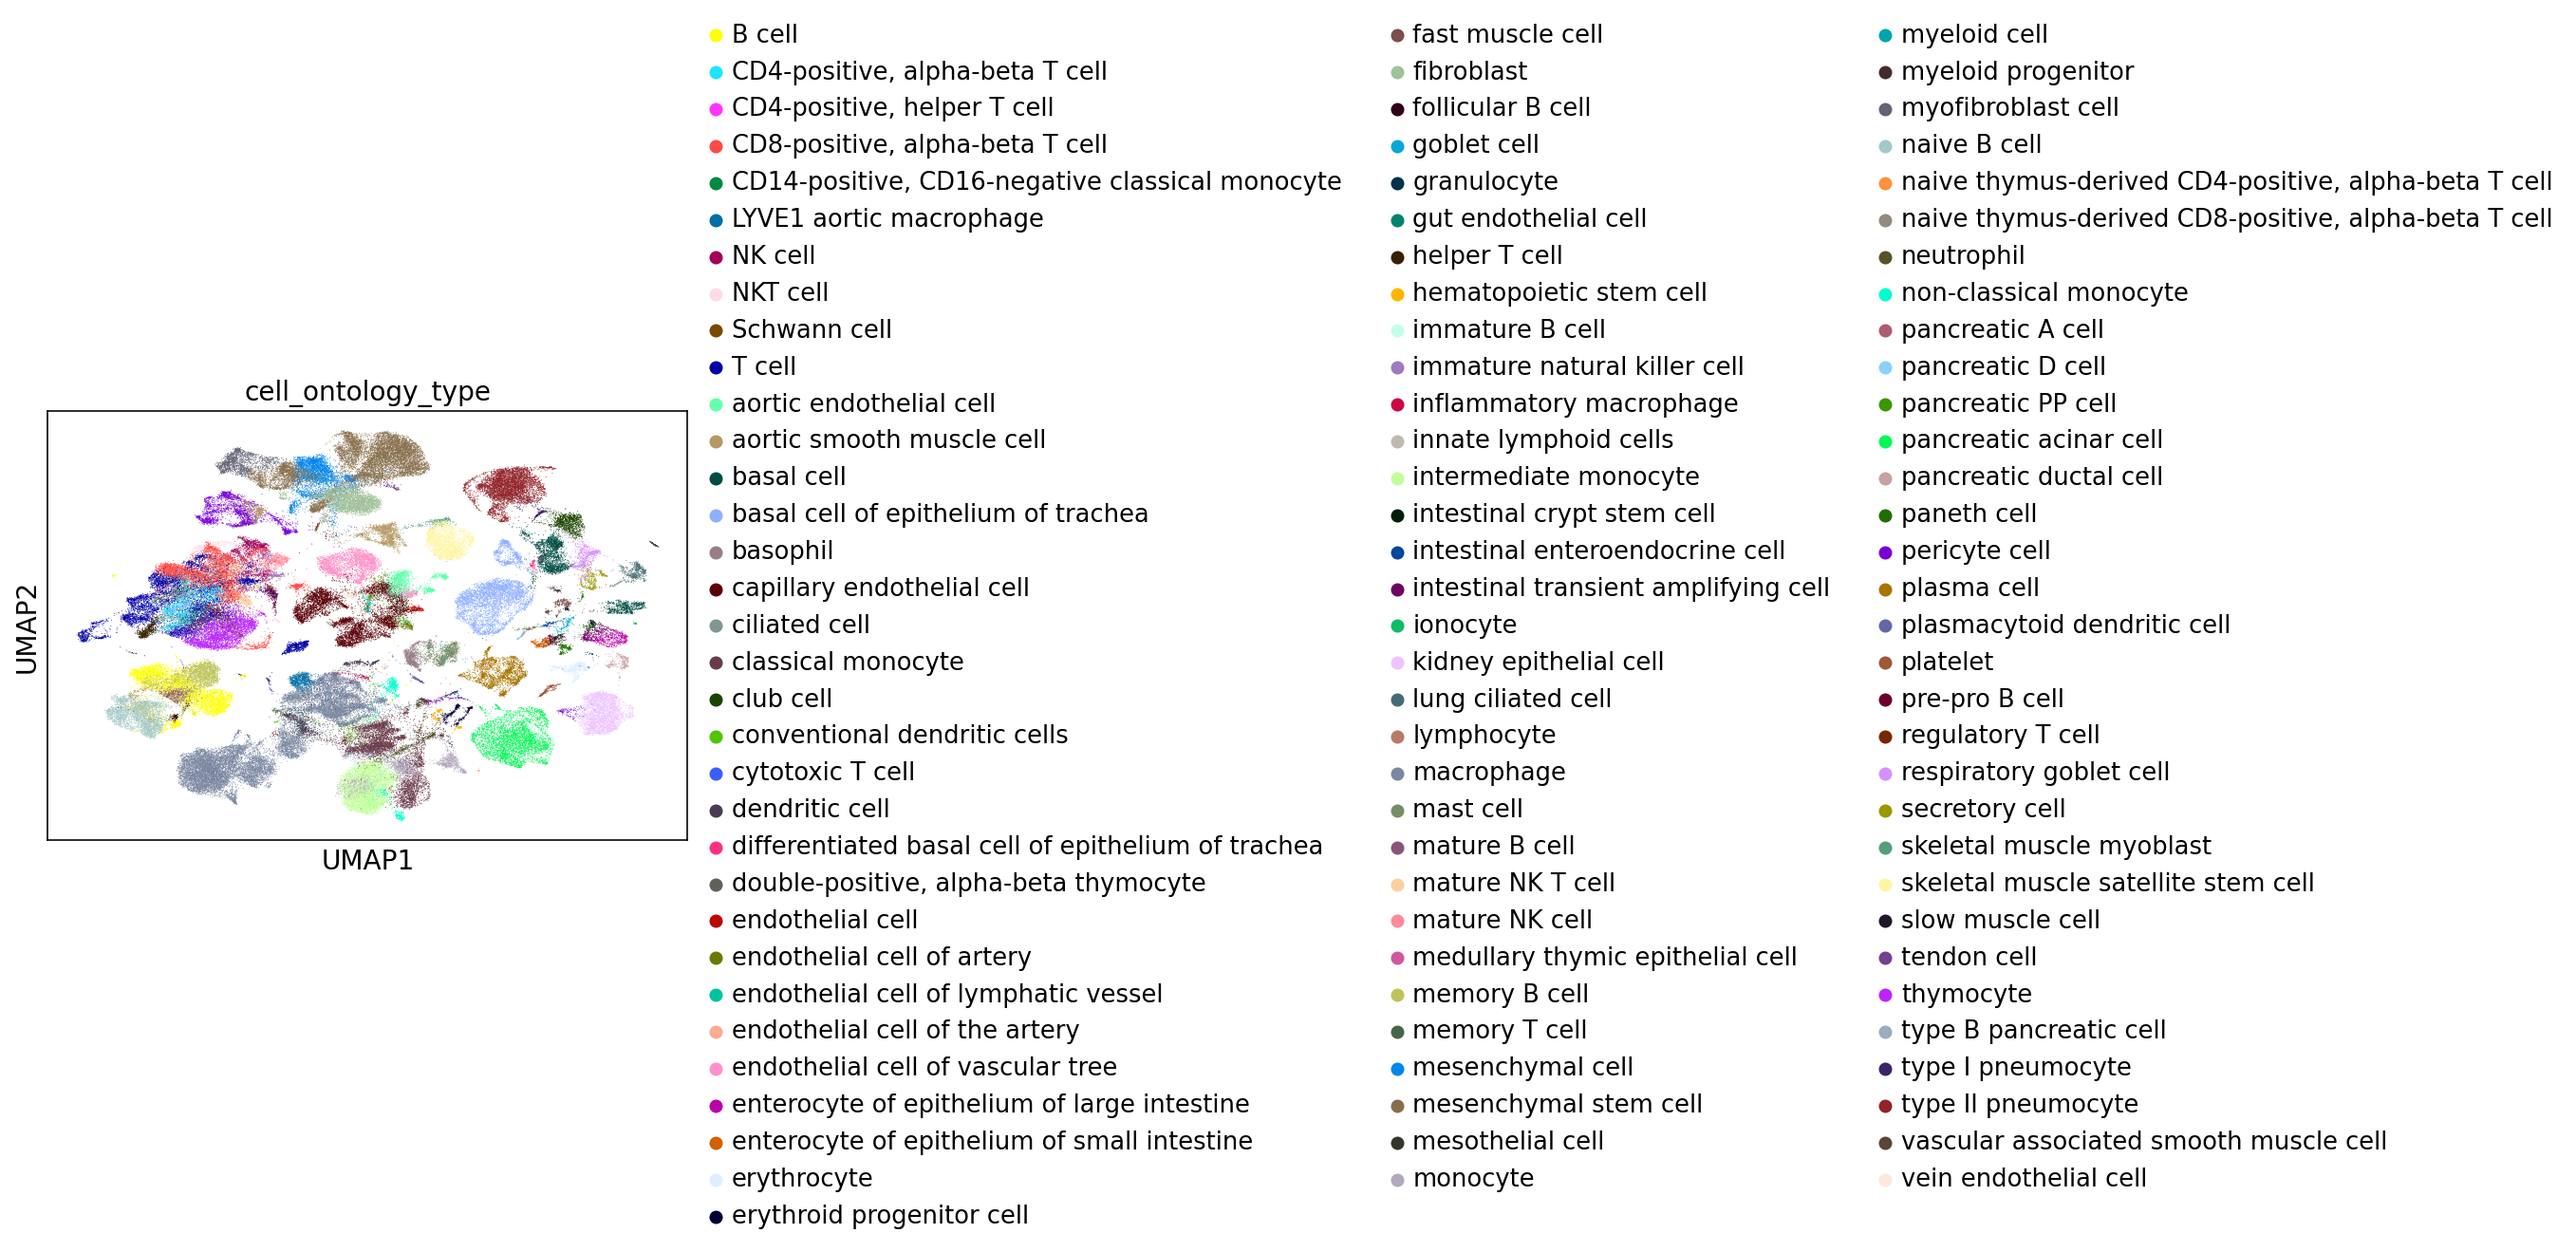

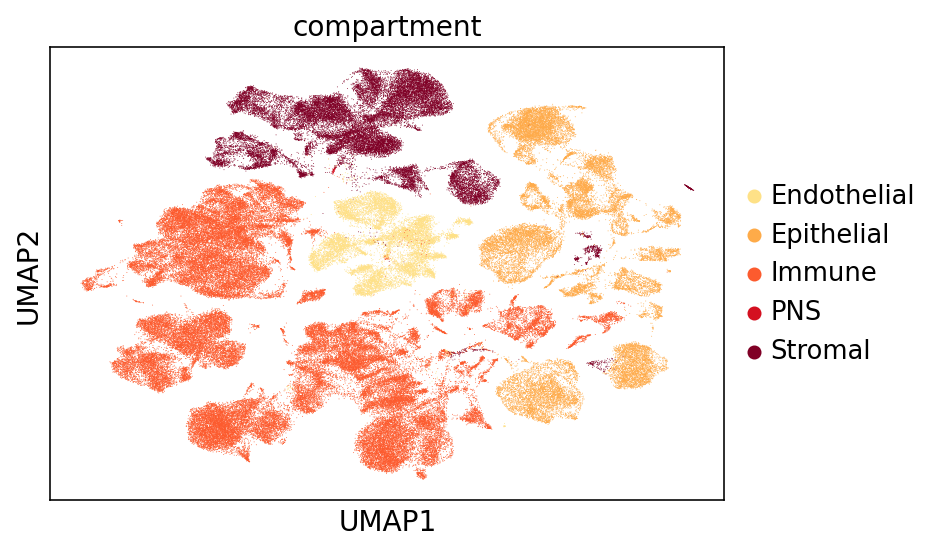

In [33]:
colorbylist = ['tissue','method','donor','cell_ontology_type','compartment']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
           save = "_global_"+c+".pdf"
          )

In [34]:
adata

AnnData object with n_obs × n_vars = 149345 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_metho

In [39]:
adata = remove_cats(adata)

In [40]:
adata.obs.groupby(['donor','tissue']).count()

X10X_run  smartseq2_barcode  smartseq2_library_plate  \
donor tissue                                                                  
TSP1  Bladder             10004              10004                    10004   
      Blood                4100               4100                     4100   
      Lung                12317              12317                    12317   
      Muscle               3322               3322                     3322   
      Pancreas             5751               5751                     5751   
TSP2  Bladder              9597               9597                     9597   
      Blood               12092              12092                    12092   
      Bone_Marrow          3588               3588                     3588   
      Kidney               3549               3549                     3549   
      Large_Intestine      1428               1428                     1428   
      Lung                20387              20387                    20387   
      Lymph_Node           9877               9877                     9877   
      Muscle              16324              16324                    16324   
      Small_Intestine      1334               1334                     1334   
      Spleen               7963               7963                     7963   
      Thymus              12582              12582                    12582   
      Trachea              6334               6334                     6334   
      Vasculature          8796               8796                     8796   

                       smartseq2_sorting_direction  smartseq2_sort_order  \
donor tissue                                                               
TSP1  Bladder                                10004                 10004   
      Blood                                   4100                  4100   
      Lung                                   12317                 12317   
      Muscle                                  3322                  3322   
      Pancreas                                5751                  5751   
TSP2  Bladder                                 9597                  9597   
      Blood                                  12092                 12092   
      Bone_Marrow                             3588                  3588   
      Kidney                                  3549                  3549   
      Large_Intestine                         1428                  1428   
      Lung                                   20387                 20387   
      Lymph_Node                              9877                  9877   
      Muscle                                 16324                 16324   
      Small_Intestine                         1334                  1334   
      Spleen                                  7963                  7963   
      Thymus                                 12582                 12582   
      Trachea                                 6334                  6334   
      Vasculature                             8796                  8796   

                       smartseq2_cDNA_Plate  cell_id  method  X10X_replicate  \
donor tissue                                                                   
TSP1  Bladder                         10004    10004   10004           10004   
      Blood                            4100     4100    4100            4100   
      Lung                            12317    12317   12317           12317   
      Muscle                           3322     3322    3322            3322   
      Pancreas                         5751     5751    5751            5751   
TSP2  Bladder                          9597     9597    9597            9597   
      Blood                           12092    12092   12092           12092   
      Bone_Marrow                      3588     3588    3588            3588   
      Kidney                           3549     3549    3549            3549   
      Large_Intestine                  14

In [42]:
adata.write(data_path + "Pilot1_Pilot2_decontX_Oct2020.h5ad")

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'X10X_run' as categorical
... storing 'smartseq2_barcode' as categorical
... storing 'smartseq2_library_plate' as categorical
... storing 'smartseq2_sorting_direction' as categorical
... storing 'smartseq2_sort_order' as categorical
... storing 'smartseq2_cDNA_Plate' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'X10X_replicate' as categorical
... storing 'sequencer' as categorical
... storing 'sex' as categorical
... storing 'tissue' as categorical
... storing 'smartseq2_well_seq' as categorical
... storing 'notes' as categorical
... storing 'smartseq2_sorted_population' as categorical
... storing 'X10X_sample' as categorical
... storing 'anatomical_position' as cate

In [43]:
data_path

'/mnt/ibm_lg/angela/sapiens/data/sapiens_paper1/'

In [41]:
adata.obs

X10X_run  \
index                                                                
AAACCCAGTGTAGCAG_TSP1_bladder_1-0                   TSP1_bladder_1   
AAACCCATCAAGTCTG_TSP1_bladder_1-0                   TSP1_bladder_1   
AAACCCATCCTTCGAC_TSP1_bladder_1-0                   TSP1_bladder_1   
AAACCCATCGAAGGAC_TSP1_bladder_1-0                   TSP1_bladder_1   
AAACGAAAGCTCCGAC_TSP1_bladder_1-0                   TSP1_bladder_1   
...                                                            ...   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...             nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...             nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...             nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...             nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...             nan   

                                                   smartseq2_barcode  \
index                                                                  
AAACCCAGTGTAGCAG_TSP1_bladder_1-0                                nan   
AAACCCATCAAGTCTG_TSP1_bladder_1-0                                nan   
AAACCCATCCTTCGAC_TSP1_bladder_1-0                                nan   
AAACCCATCGAAGGAC_TSP1_bladder_1-0                                nan   
AAACGAAAGCTCCGAC_TSP1_bladder_1-0                                nan   
...                                                              ...   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...               nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...               nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...               nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...               nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...               nan   

                                                   smartseq2_library_plate  \
index                                                                        
AAACCCAGTGTAGCAG_TSP1_bladder_1-0                                      nan   
AAACCCATCAAGTCTG_TSP1_bladder_1-0                                      nan   
AAACCCATCCTTCGAC_TSP1_bladder_1-0                                      nan   
AAACCCATCGAAGGAC_TSP1_bladder_1-0                                      nan   
AAACGAAAGCTCCGAC_TSP1_bladder_1-0                                      nan   
...                                                                    ...   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                 B133059   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                 B133059   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                 B133059   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                 B133059   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                 B133059   

                                                   smartseq2_sorting_direction  \
index                                                                            
AAACCCAGTGTAGCAG_TSP1_bladder_1-0                                          nan   
AAACCCATCAAGTCTG_TSP1_bladder_1-0                                          nan   
AAACCCATCCTTCGAC_TSP1_bladder_1-0                                          nan   
AAACCCATCGAAGGAC_TSP1_bladder_1-0                                          nan   
AAACGAAAGCTCCGAC_TSP1_bladder_1-0                                          nan   
...                                                                        ...   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                         nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                         nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                         nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                         nan   
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endo...                         nan   

                                                   smartseq2_sort_order  \
index                                                

# Look at `n_genes` and `n_counts` across the dataset 

In [23]:
adata = remove_cats(adata)
metadata = adata.obs.copy()

In [24]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

/home/angela/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


In [25]:
pd.DataFrame(metadata.groupby(['donor','tissue','anatomical_position','method'])['cell_id'].count())

cell_id
donor tissue          anatomical_position method            
TSP1  Bladder         nan                 10X           9379
                                          smartseq2      625
      Blood           nan                 10X           3808
                                          smartseq2      292
      Lung            MedialDistal        smartseq2      307
                      Proximal            smartseq2      382
                      nan                 10X          11628
      Muscle          nan                 10X           2160
                                          smartseq2     1162
      Pancreas        Endocrine           10X            506
                                          smartseq2      498
                      Exocrine            10X           4408
                                          smartseq2      339
TSP2  Bladder         nan                 10X           9215
                                          smartseq2      382
      Blood           nan                 10X          10926
                                          smartseq2     1166
      Bone_Marrow     nan                 smartseq2      310
                      vertebralbody       10X           2845
                                          smartseq2      433
      Kidney          nan                 10X           3185
                                          smartseq2      364
      Large_Intestine distal              10X            820
                      nan                 smartseq2       13
                      proximal            10X            586
                                          smartseq2        9
      Lung            Neuron              smartseq2      293
                      nan                 smartseq2      475
                      proxmedialdistal    10X          19489
                                          smartseq2      130
      Lymph_Node      Inguinal            smartseq2      304
                      nan                 10X           8640
                                          smartseq2      933
      Muscle          diaphragm           10X           4031
                                          smartseq2      285
                      nan                 smartseq2     1090
                      rectusabdominus     10X          10814
                                          smartseq2      104
      Small_Intestine distal              10X            148
                                          smartseq2        3
                      nan                 smartseq2      128
                      proximal            10X           1055
      Spleen          nan                 10X           6950
                                          smartseq2     1013
      Thymus          nan                 10X          12068
                                          smartseq2      514
      Trachea         nan                 10X           6249
                                          smartseq2       85
      Vasculature     Aorta               10X           8005
                      aorta               smartseq2      527
                      nan                 smartseq2      264

In [36]:
tissues_color_dict.keys()

dict_keys(['Bladder', 'Blood', 'Bone_Marrow', 'Kidney', 'Large_Intestine', 'Lung', 'Lymph_Node', 'Muscle', 'Pancreas', 'Small_Intestine', 'Spleen', 'Thymus', 'Trachea', 'Vasculature'])

In [2]:
import matplotlib.ticker as tkr
sns.set(font_scale=2) 

tissue_order = list(tissues_color_dict.keys())
# f, ax = plt.subplots() 
g = sns.FacetGrid(
    metadata[metadata['method']=='smartseq2'], 
    col="tissue", col_wrap=5, height=6, aspect=.8, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_genes",order=["TSP1","TSP2"], palette=donors_color_dict)#, ci=None);
plt.tight_layout()
plt.savefig("figures/ts_smartseq2_ngenes.pdf")

g = sns.FacetGrid(
    metadata[metadata['method']=='smartseq2'], 
    col="tissue", col_wrap=5, height=6, aspect=.8, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_counts",order=["TSP1","TSP2"], palette=donors_color_dict)#, ci=None);
plt.tight_layout()
plt.savefig("figures/ts_smartseq2_ncounts.pdf")

g = sns.FacetGrid(
    metadata[metadata['method']=='10X'], 
    col="tissue", col_wrap=5, height=6, aspect=.8, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_genes",order=["TSP1","TSP2"], palette=donors_color_dict)#, ci=None);
plt.tight_layout()
plt.savefig("figures/ts_10X_ncounts.pdf")

g = sns.FacetGrid(
    metadata[metadata['method']=='10X'], 
    col="tissue", col_wrap=5, height=6, aspect=.8, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_counts",order=["TSP1","TSP2"], palette=donors_color_dict)#, ci=None);
ax = plt.gca()
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0e}".format(x)))
plt.tight_layout()
plt.savefig("figures/ts_10X_ngenes.pdf")

NameError: name 'sns' is not defined

# Sankey diagram for compartment cell type

In [38]:
import plotly
import chart_studio.plotly as py
# import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [39]:
metadata.columns

Index(['X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate',
       'smartseq2_sorting_direction', 'smartseq2_sort_order',
       'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate',
       'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes',
       'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position',
       'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class',
       'manual_annotation', 'doublet_filter', 'compartment', 'batch',
       'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation',
       'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps',
       'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet',
       'kNN', 'SVM', 'scANVI', 'compartment_pred_svm',
       'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed',
       'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed',
       'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized',
      

In [40]:
set(adata.obs['tissue'])

{'Bladder',
 'Blood',
 'Bone_Marrow',
 'Kidney',
 'Large_Intestine',
 'Lung',
 'Lymph_Node',
 'Muscle',
 'Pancreas',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Trachea',
 'Vasculature'}

In [42]:
metadata.groupby(
    ['compartment','cell_ontology_type']
).count()

X10X_run  \
compartment cell_ontology_type                                 
Endothelial aortic endothelial cell                     1553   
            capillary endothelial cell                  6485   
            endothelial cell                             275   
            endothelial cell of artery                   596   
            endothelial cell of lymphatic vessel         186   
...                                                      ...   
Stromal     skeletal muscle myoblast                     255   
            skeletal muscle satellite stem cell         2541   
            slow muscle cell                              49   
            tendon cell                                  109   
            vascular associated smooth muscle cell       121   

                                                    smartseq2_barcode  \
compartment cell_ontology_type                                          
Endothelial aortic endothelial cell                              1553   
            capillary endothelial cell                           6485   
            endothelial cell                                      275   
            endothelial cell of artery                            596   
            endothelial cell of lymphatic vessel                  186   
...                                                               ...   
Stromal     skeletal muscle myoblast                              255   
            skeletal muscle satellite stem cell                  2541   
            slow muscle cell                                       49   
            tendon cell                                           109   
            vascular associated smooth muscle cell                121   

                                                    smartseq2_library_plate  \
compartment cell_ontology_type                                                
Endothelial aortic endothelial cell                                    1553   
            capillary endothelial cell                                 6485   
            endothelial cell                                            275   
            endothelial cell of artery                                  596   
            endothelial cell of lymphatic vessel                        186   
...                                                                     ...   
Stromal     skeletal muscle myoblast                                    255   
            skeletal muscle satellite stem cell                        2541   
            slow muscle cell                                             49   
            tendon cell                                                 109   
            vascular associated smooth muscle cell                      121   

                                                    smartseq2_sorting_direction  \
compartment cell_ontology_type                                                    
Endothelial aortic endothelial cell                                        1553   
            capillary endothelial cell                                     6485   
            endothelial cell                                                275   
            endothelial cell of artery                                      596   
            endothelial cell of lymphatic vessel                            186   
...                                                                         ...   
Stromal     skeletal muscle myoblast                                        255   
            skeletal muscle satellite stem cell                            2541   
            slow muscle cell                                                 49   
            tendon cell                                                     109   
            vascular associated smooth muscle cell                          121   

                                                    smartseq2_sort_order  \
compartment cell_ontology_type                                             
Endotheli

In [44]:
df = metadata.groupby(#,'manual_cell_ontology_class'
    ['tissue','cell_ontology_type','compartment']).agg({'cell_id':len}).reset_index()
display(df.shape)
# df = df[df['cell_id']>10]
display(df.shape)

(218, 4)

(218, 4)

In [45]:
pwd

'/home/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'

In [48]:
for comp in ['Endothelial','Immune','Epithelial','Stromal','PNS','all']:
    if comp == 'all':
        fig = genSankey(df,
                        cat_cols=['tissue','cell_ontology_type','compartment'],
                        cat_cols_color = [tissues_color_dict,'#00A1E0',compartments_color_dict],
                        value_cols='cell_id',
                        title='tissue_cell_type')
        iplot(fig, validate=False)
        plotly.offline.plot(fig, validate=False, filename="figures/sankey_"+comp+".html")#, output_type='div')
    else:
        fig = genSankey(df[df['compartment']==comp],
                        cat_cols=['tissue','cell_ontology_type'],
                        cat_cols_color = [tissues_color_dict,compartments_color_dict[comp]],
                        value_cols='cell_id',
                        title=comp)
        iplot(fig, validate=False)
        plotly.offline.plot(fig, validate=False, filename="figures/sankey_"+comp+".html")#, output_type='div')

# Write to table to make ballon plot in R

In [50]:
adata = remove_cats(adata)
adata.obs['trickR'] = 'Tissue'
pd.DataFrame(adata.obs.groupby(
    ['tissue','anatomical_position','method','donor','trickR'])['cell_id'].count()).reset_index().to_csv("sapiens_metadata_ballon_plot.csv")


# Summary statistics

In [ ]:
adata.obs.columns

In [51]:
print('all',len(set(adata.obs['cell_ontology_type'])))
for c in set(adata.obs['compartment']):
    comp = adata.obs[adata.obs['compartment']==c]
    print(c,len(set(comp['cell_ontology_type'])))
for t in set(adata.obs['tissue']):
    tiss = adata.obs[adata.obs['tissue']==t]
    
    print(t,len(set(tiss['cell_ontology_type'])))

all 97
Stromal 13
PNS 1
Immune 48
Endothelial 9
Epithelial 26
Spleen 16
Thymus 23
Vasculature 13
Bone_Marrow 13
Small_Intestine 11
Bladder 17
Lymph_Node 16
Kidney 8
Pancreas 14
Large_Intestine 10
Blood 25
Trachea 11
Lung 23
Muscle 18


In [1]:
pwd

'/home/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'